### RSM8413 Group Assignment 1
#### Python Source Code - Group 7

In [1]:
# Load libraries
# libraries for data exploration
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
import numpy as np
#libraries for data visulizaion
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Input Dataset

In [2]:
dataset = pd.read_excel("UniversalBank.xlsx", sheetname='Data')
#dataset

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


The original dataset contains 5000 observations and 13 variables, with no missing values (which is good).

Then briefly view the summary of the dataset:

In [4]:
set_option('precision', 3) #only keep three decimal places
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.00,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000
mean,2500.50,45.338,20.105,73.774,93152.503,2.396,1.938,56.499,0.096,0.104,0.060,0.597,0.294
std,1443.52,11.463,11.468,46.034,2121.852,1.148,1.748,101.714,0.295,0.306,0.238,0.491,0.456
min,1.00,23.000,-3.000,8.000,9307.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1250.75,35.000,10.000,39.000,91911.000,1.000,0.700,0.000,0.000,0.000,0.000,0.000,0.000
50%,2500.50,45.000,20.000,64.000,93437.000,2.000,1.500,0.000,0.000,0.000,0.000,1.000,0.000
75%,3750.25,55.000,30.000,98.000,94608.000,3.000,2.500,101.000,0.000,0.000,0.000,1.000,1.000
max,5000.00,67.000,43.000,224.000,96651.000,4.000,10.000,635.000,1.000,1.000,1.000,1.000,1.000


Several things need to be addressed for data preparation:
* ID variable is just index, we should remove the column.
* Experience variable means "the number of years of professional experience", with minimum -3
    * Take a further look at the Experience column, there are 52 rows with negative year of professional experiences, while some of them have relative high income -> the negative values are hard to explain.
    * Since 52 rows represent only 1% of the dataset, we decided to omit the rows with negative Experience.
* ZIP Code should not be considered as numerical variable,
    * There is one entry having 4 digits ZIP code while other 4999 entries are 5 digits, which seems like data entry error and should be removed
    * The ZIP code should be scaled into several levels.
* Personal Loan is the target variable, as well as a categorical variable with 0 as rejected loan offer and 1 as accepted loan offer
* Securities Account, CD Account, Online and CreditCard are categorical variables with 2 levels, 0 as no and 1 as yes.

##### Input "cleaned" dataset

In [5]:
df = pd.read_excel("UniversalBank2.xlsx", sheetname='Data')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4947 entries, 0 to 4946
Data columns (total 12 columns):
Age                   4947 non-null int64
Experience            4947 non-null int64
Income                4947 non-null int64
ZIP Code              4947 non-null int64
Family                4947 non-null int64
CCAvg                 4947 non-null float64
Mortgage              4947 non-null int64
Personal Loan         4947 non-null int64
Securities Account    4947 non-null int64
CD Account            4947 non-null int64
Online                4947 non-null int64
CreditCard            4947 non-null int64
dtypes: float64(1), int64(11)
memory usage: 463.9 KB


The new dataset has 4947 rows with 12 columns, 53 records were removed (all with Personal Loan equal to 0).

In [6]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4947.000,4947.000,4947.000,4947.000,4947.000,4947.000,4947.000,4947.000,4947.000,4947.000,4947.000,4947.000
mean,45.556,20.330,73.825,3.799,2.391,1.936,56.646,0.097,0.104,0.061,0.597,0.294
std,11.322,11.313,46.111,1.703,1.148,1.748,101.836,0.296,0.306,0.239,0.491,0.456
min,24.000,0.000,8.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,36.000,10.500,39.000,2.000,1.000,0.700,0.000,0.000,0.000,0.000,0.000,0.000
50%,46.000,20.000,64.000,4.000,2.000,1.500,0.000,0.000,0.000,0.000,1.000,0.000
75%,55.000,30.000,98.000,5.000,3.000,2.600,101.000,0.000,0.000,0.000,1.000,1.000
max,67.000,43.000,224.000,7.000,4.000,10.000,635.000,1.000,1.000,1.000,1.000,1.000


In [7]:
colNames = ['Age','Experience','Income','ZIP Code','Family','CCAvg','Mortgage',
            'Personal Loan','Securities Account','CD Account','Online','CreditCard']

##### calculate correlation on numerical variables

In [8]:
numeric = df.iloc[:,np.r_[0:3,5,6]]
#numeric

In [9]:
corr = numeric.corr(method="pearson")
corr

,Age,Experience,Income,CCAvg,Mortgage
Age,1.000,0.994,-0.058,-0.051,-0.015
Experience,0.994,1.000,-0.049,-0.049,-0.013
Income,-0.058,-0.049,1.000,0.646,0.207
CCAvg,-0.051,-0.049,0.646,1.000,0.110
Mortgage,-0.015,-0.013,0.207,0.110,1.000


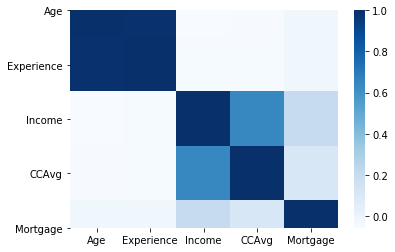

In [10]:
# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='Blues')

strongly correlated: Age and Experience <br />
moderate correlated: Income and CCAvg

In [11]:
df["Personal Loan"].value_counts()

0    4467
1     480
Name: Personal Loan, dtype: int64

Text(0.5, 1.0, 'Personal Loan Acceptance: last campaign')

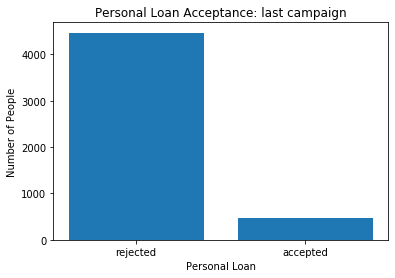

In [12]:
label = ['rejected','accepted']
count = [4467,480]
plt.bar(label,count)
plt.xlabel("Personal Loan")
plt.ylabel("Number of People")
plt.title('Personal Loan Acceptance: last campaign')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b584d6898>,
      dtype=object)

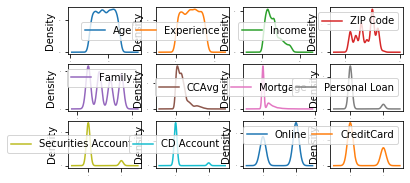

In [13]:
df.plot(kind="density", subplots=True, layout=(4,4), legend = True, sharex=False, fontsize=1)

##### Relationship b/w the predictor variables and the target:
* target variable -> categorical <br />
    * categorical + numerical -> side-by-side boxplot <br />
    * categorical + categorical -> grouped bar charts

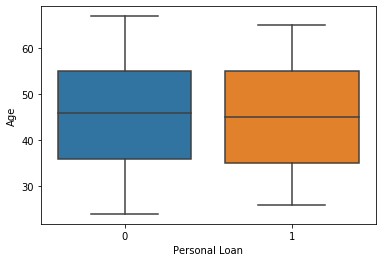

In [14]:
sns.boxplot(x = "Personal Loan", y = "Age", data=df)

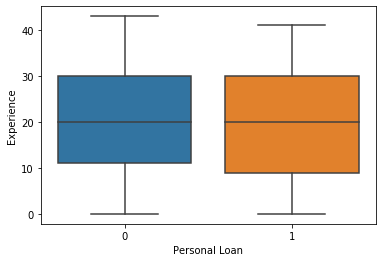

In [15]:
sns.boxplot(x = "Personal Loan", y = "Experience", data=df)

"Personal Loan" vs. "Age" and "Experience" should be very similar b/c the two predicators are highly correlated.

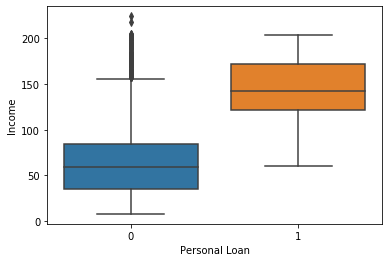

In [16]:
sns.boxplot(x = "Personal Loan", y = "Income", data=df)

Generally, people who have higher income are more likely to accept the loan.

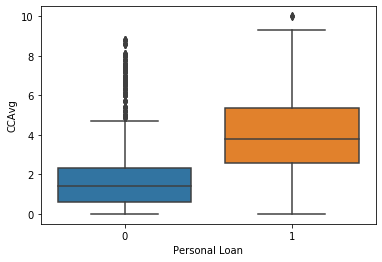

In [17]:
sns.boxplot(x = "Personal Loan", y = "CCAvg", data=df)

People who use credit card more intend to have the personal loan.

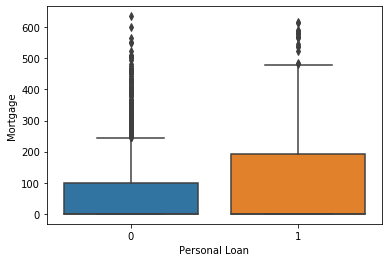

In [18]:
sns.boxplot(x = "Personal Loan", y = "Mortgage", data=df)

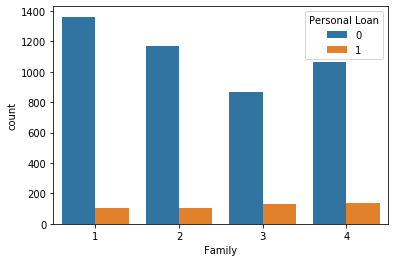

In [19]:
sns.countplot(x = "Family", hue="Personal Loan", data=df)

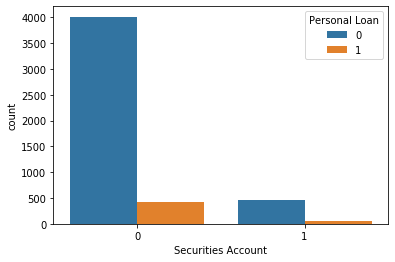

In [20]:
sns.countplot(x = "Securities Account", hue="Personal Loan", data=df)

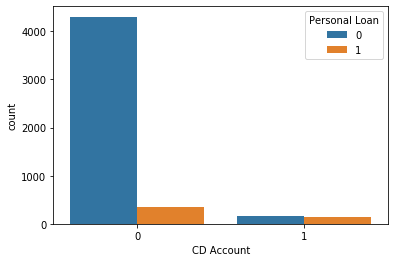

In [21]:
sns.countplot(x = "CD Account", hue="Personal Loan", data=df)

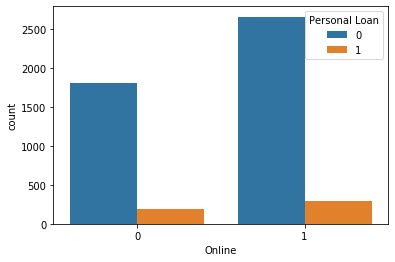

In [22]:
sns.countplot(x = "Online", hue="Personal Loan", data=df)

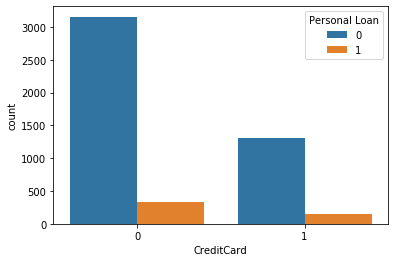

In [23]:
sns.countplot(x = "CreditCard", hue="Personal Loan", data=df)


#### KNN Classification

##### Normalize the numerical variables to prepare for KNN algorithm

In [24]:
# load library for standardization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# create the standard scaler object
scaler = MinMaxScaler()

# fit the scaler to numerical variables
scaler.fit(numeric)

# array: standardized numerical variables
scaled_numeric = scaler.transform(numeric)

# dataset: standardized numerical variables
df_std_numeric = pd.DataFrame(scaled_numeric, columns=['Age','Experience','Income','CCAvg','Mortgage'])
df_std_numeric.head()

,Age,Experience,Income,CCAvg,Mortgage
0,0.233,0.209,0.389,0.280,0.000
1,0.814,0.814,0.236,0.120,0.000
2,0.488,0.488,0.097,0.030,0.000
3,0.186,0.186,0.616,0.433,0.000
4,0.209,0.209,0.009,0.100,0.128


The numerical values are all normalized, then extract all categorical values and concatenate to another dataset.

In [25]:
categ = df.iloc[:,np.r_[3,4,8,9,10,11,7]]
#categorical

In [26]:
mydata = pd.concat([df_std_numeric, categ], axis=1)
mydata.head()

,Age,Experience,Income,CCAvg,Mortgage,ZIP Code,Family,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,0.233,0.209,0.389,0.280,0.000,1,1,0,0,1,0,0
1,0.814,0.814,0.236,0.120,0.000,1,4,0,0,1,0,0
2,0.488,0.488,0.097,0.030,0.000,1,1,0,0,1,0,0
3,0.186,0.186,0.616,0.433,0.000,1,2,0,0,0,0,0
4,0.209,0.209,0.009,0.100,0.128,1,4,0,0,0,1,0


##### Split the normalized data into training and testing subsets

In [27]:
# load library for data spliting
from sklearn.model_selection import train_test_split

x = pd.DataFrame(mydata, columns=mydata.columns[:-1]) #predictors
y = mydata['Personal Loan']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 666)

##### Train the Model

In [28]:
# load library for KNN
from sklearn.neighbors import KNeighborsClassifier

# KNN model
knn = KNeighborsClassifier(n_neighbors=1) #k=1

# Train the model
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

##### Predict a new input
Consider the new input: <br />
ID=5001, Age=40, Experience = 10, Income = 84, ZIP Code = 90277, Family = 2, CCAvg = 2, Mortgage = 0, Securities Account = 0, CD Account = 0, Online = 1, and Credit Card = 1.

In [29]:
newperson = pd.DataFrame(
    {
        "Age": [40],
        "Experience": [10],
        "Income": [84],
        "CCAvg": [2],
        "Mortgage": [0],
         "ZIP Code": [1],
        "Family": [2],
        "Securities Account": [0],
        "CD Account": [0],
        "Online": [1],
        "CreditCard": [1]
    }
)
newperson

,Age,CCAvg,CD Account,CreditCard,Experience,Family,Income,Mortgage,Online,Securities Account,ZIP Code
0,40,2,0,1,10,2,84,0,1,0,1


In [30]:
p_num = newperson.iloc[:,np.r_[0,1,2,3,4]]
#p_num

In [31]:
scal_p_num = scaler.transform(p_num)
df_std_pnum = pd.DataFrame(scal_p_num, columns=['Age','Experience','Income','CCAvg','Mortgage'])
#df_std_pnum

In [32]:
p_cat = newperson.iloc[:, np.r_[5,6,7,8,9,10]]
#p_cat

In [33]:
newstdperson = pd.concat([df_std_pnum, p_cat], axis=1)
newstdperson #new person is standardized

,Age,Experience,Income,CCAvg,Mortgage,Family,Income,Mortgage,Online,Securities Account,ZIP Code
0,0.372,0.047,-0.037,0.1,0.016,2,84,0,1,0,1


In [34]:
knn.predict(newstdperson)

array([0])

Our KNN model claims that this new customer will NOT accept the personal loan offer.

##### Review the model accuracy

In [35]:
result = knn.predict(x_test) #use the knn model to predict the result using x_test dataset

In [39]:
# load library for model evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, result))

Accuracy: 0.9175424413904608


Accuracy rate 91.8%

In [40]:
# confusion matrix
matrix = confusion_matrix(y_test, result)
matrix

array([[1083,   35],
       [  67,   52]])


| Truth/Prediction | False | True | Total |
| --- | --- | --- | --- |
| False | 1083 | 35 | 1118 |
| True | 67 | 52 | 119 |
| Total | 1150 | 87 | 1237 |

In [41]:
# misclassification rate
sum([matrix[0,1],matrix[1,0]]) / np.sum(matrix)

0.08245755860953921

Misclassification rate 8.25%

##### Tuning the model: choose a better k-value

Using KFold method to perform the cross validation.

In [44]:
#load libraries that required for performing parameter tuning with knn model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

num_folds = 8
set_seed = 666
scoring = "accuracy"
k_values = np.arange(1,21)

cv_result = []

for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=num_folds, scoring = scoring)
    cv_result.append(scores.mean())

In [45]:
#error rate is 1-accuracy
error = [1 - x for x in cv_result]

#determine the optimal k
k_opt = k_values[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(k_opt))

The optimal number of neighbors is 5


Text(0, 0.5, 'Error Rate')

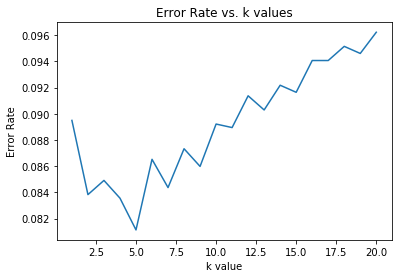

In [46]:
plt.plot(k_values, mse)
plt.title("Error Rate vs. k values")
plt.xlabel("k value")
plt.ylabel("Error Rate")

Now we can re-train the model using the optimal value of k: k=5

In [47]:
knn2 = KNeighborsClassifier(n_neighbors=k_opt)
knn2.fit(x_train, y_train)
result2 = knn2.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, result2))

Accuracy: 0.9207760711398545


Accuracy rate 92.1%

In [48]:
matrix2 = confusion_matrix(y_test, result2)
matrix2

array([[1110,    8],
       [  90,   29]])

In [49]:
# misclassification rate
sum([matrix2[0,1],matrix2[1,0]]) / np.sum(matrix2)

0.07922392886014551

Misclassification rate 7.92%